In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time
# start = time.time()

# %cd /content/drive/MyDrive/Colab Notebooks/deep_learning_pjt

# !unzip -qq "/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face_zip.zip"

# print(f"압축해제 소요시간 :{time.time()-start}")

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

train_dir = '/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face/train'
val_dir = '/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face/validation'
test_dir = '/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face/test'
train_dir, val_dir , test_dir

('/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face/train',
 '/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face/validation',
 '/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face/test')

In [4]:
from glob import glob
class_paths = glob(train_dir+'/*')
class_names = []
for class_path in class_paths:
    class_names.append(class_path.split('/')[-1])
class_names

['S001_E01',
 'S001_E02',
 'S001_E03',
 'S002_E01',
 'S002_E02',
 'S002_E03',
 'S003_E01',
 'S003_E02',
 'S003_E03',
 'S004_E01',
 'S004_E02',
 'S004_E03',
 'S005_E01',
 'S005_E02',
 'S005_E03',
 'S006_E01',
 'S006_E02',
 'S006_E03']

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1/255) 
val_datagen = ImageDataGenerator(rescale=1/255) 
test_datagen = ImageDataGenerator(rescale=1/255) 

train_generator = train_datagen.flow_from_directory(train_dir,  # target directory
                                                    classes=class_names, # cats, dogs directory 순서로 label 0,1을 설정
                                                    target_size=(100,100),
                                                    batch_size= 32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir,  # target directory
                                                    classes=class_names, # cats, dogs directory 순서로 label 0,1을 설정
                                                    target_size=(100,100),
                                                    batch_size= 32,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,  # target directory
                                                    classes=class_names, # cats, dogs directory 순서로 label 0,1을 설정
                                                    target_size=(100,100),
                                                    batch_size= 32,
                                                    class_mode='categorical')

Found 52416 images belonging to 18 classes.
Found 22464 images belonging to 18 classes.
Found 18720 images belonging to 18 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Activation,BatchNormalization
from keras.optimizers import Adam
import time

start = time.time()

model = Sequential([
    Conv2D(filters=32,kernel_size=3,padding='same',input_shape=(100, 100, 3)),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=32,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=64,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=64,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=128,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=128,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(18,activation='softmax')
])

model.compile(optimizer=Adam(1e-4),loss='categorical_crossentropy',metrics=['acc'])

# def get_step(train_len,batch_size):
#   if(train_len % batch_size > 0 ):
#     return train_len // batch_size +1
#   else:
#     return train_len // batch_size

history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=1638, # 52416 / 32 = 1638
                    validation_data=val_generator,
                    validation_steps=702) # 22464 / 32 = 702
print(f"학습 소요시간 :{time.time()-start}")

Epoch 1/10
 216/1638 [==>...........................] - ETA: 2:50:05 - loss: 2.3819 - acc: 0.2070

UnknownError: ignored

총 93600 개  

test : 52416개 ( 93600 * 0.8 * 0.7 )  
val : 22464개 ( 93600 * 0.8 * 0.3 )  
test : 18720개 ( 93600 * 0.2)  

사진크기  
(874,576) -> (150,150)  

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 batch_normalization_47 (Bat  (None, 100, 100, 32)     128       
 chNormalization)                                                
                                                                 
 activation_47 (Activation)  (None, 100, 100, 32)      0         
                                                                 
 conv2d_41 (Conv2D)          (None, 100, 100, 32)      9248      
                                                                 
 batch_normalization_48 (Bat  (None, 100, 100, 32)     128       
 chNormalization)                                                
                                                                 
 activation_48 (Activation)  (None, 100, 100, 32)     

In [ ]:
model.save('korean_face_classification_all_c_generator_model.h5')
model.save_weights('/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt')
# from tensorflow.keras.models import load_model
# model = load_model("korean_face_classification_all_c_generator_model.h5")

In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt'

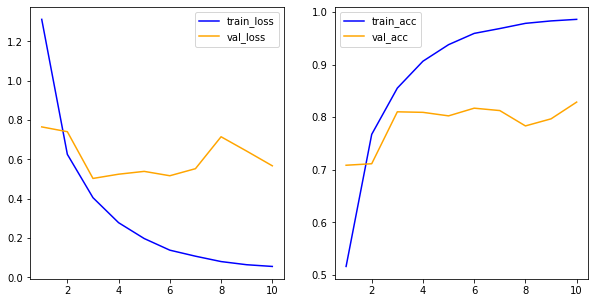

In [ ]:
hist_dict = history.history

import matplotlib.pyplot as plt
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
epochs = range(1,len(loss)+1) # len(val_loss) 써도됌

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.legend()

acc = hist_dict['acc']
val_acc= hist_dict['val_acc']
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.legend()

검증하기  

test : 18720개 ( 93600 * 0.2)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255) 
test_generator = test_datagen.flow_from_directory(test_dir,  # target directory
                                                    classes=class_names, # cats, dogs directory 순서로 label 0,1을 설정
                                                    target_size=(100,100),
                                                    batch_size= 32,
                                                    class_mode='categorical')
test_preds = model.predict(test_generator)

Found 18720 images belonging to 18 classes.
585/585 [==============================] - 148s 253ms/step


In [ ]:
np.argmax(test_preds[0])

7

In [ ]:
class_names_hangul = ['보통_무표정','보통_활짝웃음','보통_찡그림',
                      '일반안경_무표정','일반안경_활짝웃음','일반안경_찡그림',
                      '뿔테안경_무표정','뿔테안경_활짝웃음','뿔테안경_무표정_찡그림',
                      '선글라스_무표정','선글라스_활짝웃음','선글라스_찡그림',
                      '모자_무표정','모자_활짝웃음','모자_찡그림',
                      '모자+뿔테_무표정','모자+뿔테_활짝웃음','모자+뿔테_찡그림',
                      ]

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,974 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

(32, 100, 100, 3) (32, 18)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


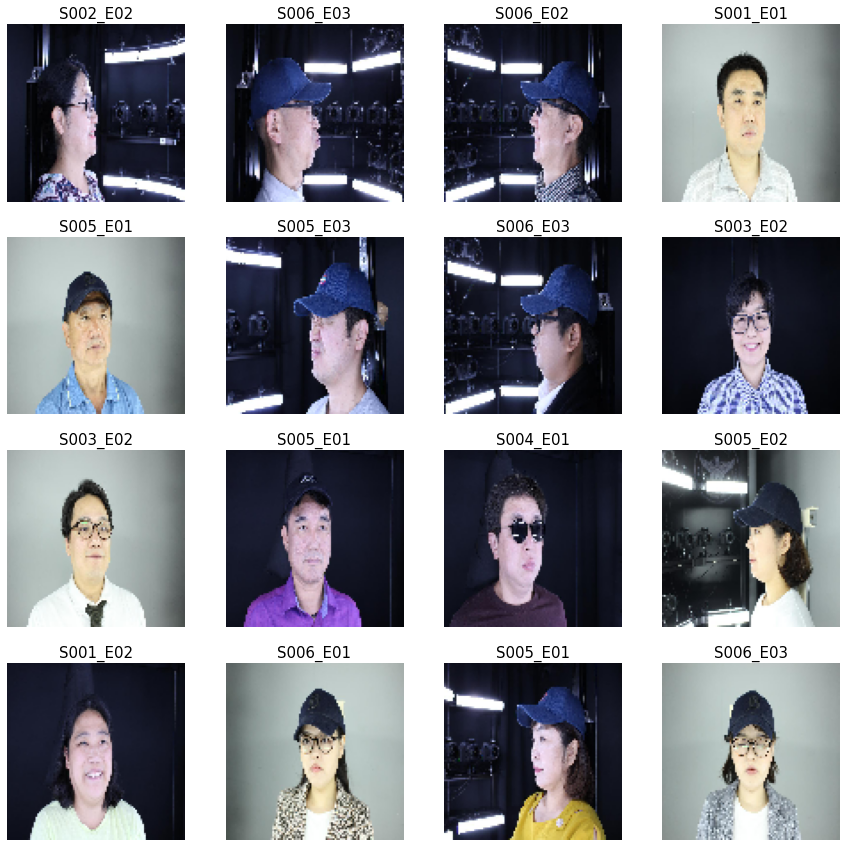

In [ ]:
# import matplotlib.pyplot as plt
 
# # 한글 폰트 사용을 위해서 세팅
# from matplotlib import font_manager, rc
# font_path = "/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

# for i in range(9):
#   np.random.randint(18721,9)

for imgs,labels  in test_generator:
  print(imgs.shape, labels.shape)
  print(labels[:16])

  fig, axes = plt.subplots(4, 4)
  fig.set_size_inches(15,15)
  for i in range(16):
      axes[i//4, i%4].imshow(imgs[i])
      axes[i//4, i%4].set_title(class_names[np.argmax(labels[i])], fontsize=15)
      axes[i//4, i%4].axis('off')
  plt.show()
  break

In [ ]:
print(test_generator.class_indices)

{'S001_E01': 0, 'S001_E02': 1, 'S001_E03': 2, 'S002_E01': 3, 'S002_E02': 4, 'S002_E03': 5, 'S003_E01': 6, 'S003_E02': 7, 'S003_E03': 8, 'S004_E01': 9, 'S004_E02': 10, 'S004_E03': 11, 'S005_E01': 12, 'S005_E02': 13, 'S005_E03': 14, 'S006_E01': 15, 'S006_E02': 16, 'S006_E03': 17}


In [ ]:
test_predict = np.argmax(pred,axis=1)
len(test_predict), test_predict

(18720, array([15, 12,  2, ..., 12,  2,  8]))

In [ ]:
test_loss,test_acc = model.evaluate_generator(test_generator)
print(f"정확도: {np.round(test_acc,2)*100}%")

<ipython-input-43-596375c7876f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss,test_acc = model.evaluate_generator(test_generator)


정확도: 82.0%


In [ ]:
# Label 얻기
labels = test_generator.classes
len(labels) , labels

(18720, array([ 0,  0,  0, ..., 17, 17, 17], dtype=int32))

In [ ]:
test_acc

0.8193910121917725

In [ ]:
# class_names => [S001_E01....S006_E03]

np.random.seed(0)
test_samples_idx = []

for i in range(9):
 np.random.randint(18721,9)
